## Lesson 4 Selecting pixel coordinates from an image file

#### This is the first step in being able to select data points from a graph found in the literature or on the web.  Next week we will pull data points from a plot found in the literature using this method.  We will also reanalyze the data and check the author's conclusions. 

<IPython.core.display.Javascript object>


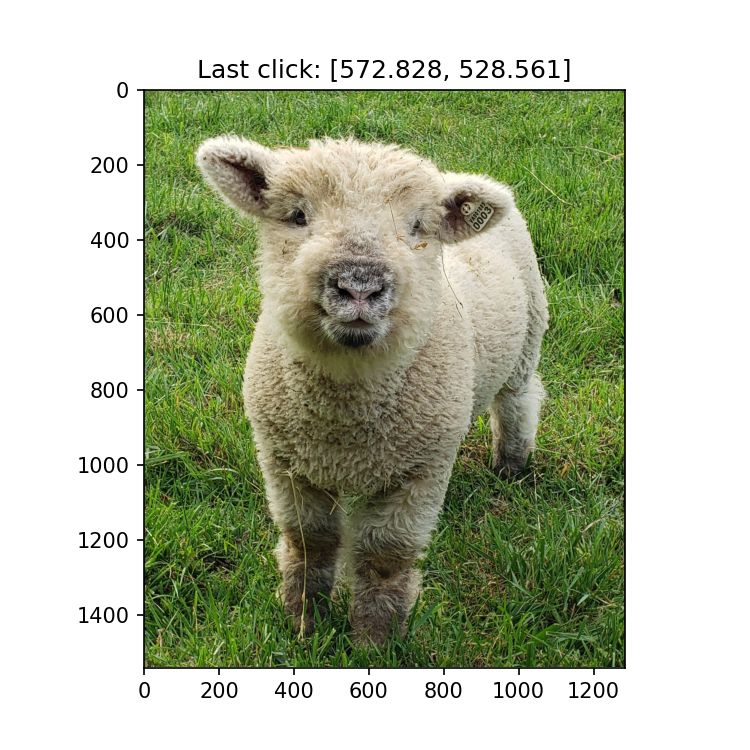

In [1]:
# the following line gives an interactive plot; default is %matplotlib inline
%matplotlib notebook  

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
img = mpimg.imread('jack.jpg')
ax1.imshow(img)
imgsize=img.shape  #will use this below contains (ypixels, xpixels, colordepth)

#below all part of matplotlib
pos = []
def onclick(event):
    pos.append([event.xdata,event.ydata])
    ax1.set_title(f'Last click: [{event.xdata:.3f}, {event.ydata:.3f}]')
cid=fig.canvas.mpl_connect('button_press_event', onclick) 

fig.show()

#### > Click on the nose, left eye, right eye, and nose again in the above image.  These four points will be stored in a variable called "pos".  Run the code below to see the values of the points.

In [2]:
pos

[[572.8275566596487, 520.5508116883116],
 [416.6249592570514, 332.3066558441558],
 [733.035348867441, 356.33782467532455],
 [572.8275566596487, 528.5612012987012]]

#### The code below will plot the point you selected above and connect them in the order that you selected.  If you selected the four points corresponding to the nose and eyes, you should see a triangle below.  

<IPython.core.display.Javascript object>


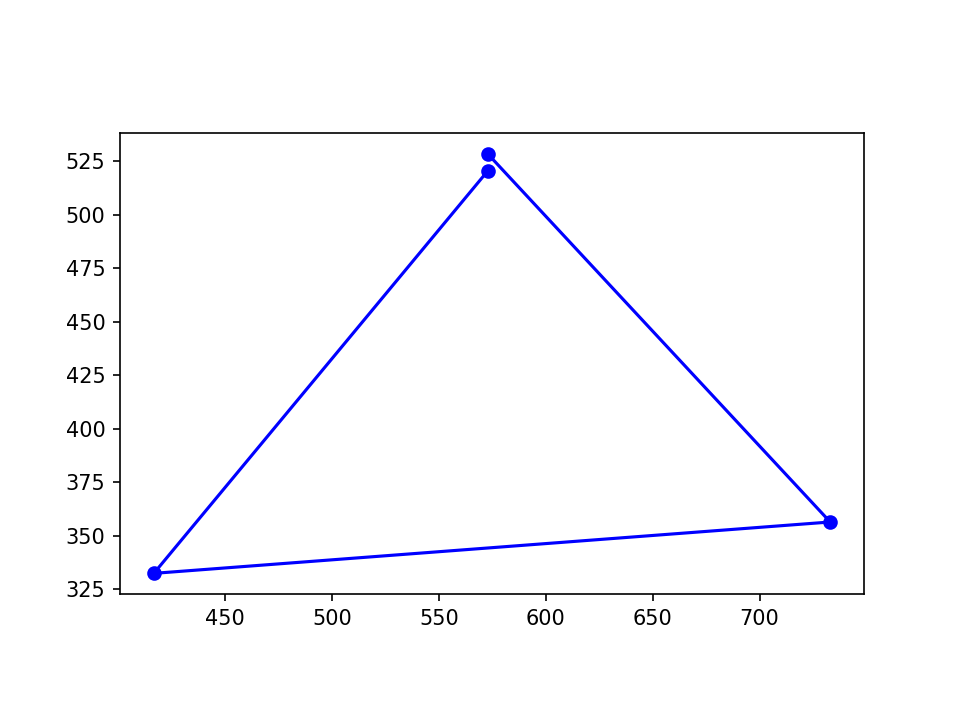

In [3]:
data=np.array(pos)
fig.canvas.mpl_disconnect(cid) #cid is the image above.  we need to close it first. 
fig, ax = plt.subplots()
ax.plot(data[:,0],data[:,1], 'bo-') #blue circles & lines
ax.set_aspect(1) # change this and see what it does
plt.show()

Notice the triangle of points plotted above is upside down.  This is because the origin of the image file (sheep) is in the **upper** left but the plot puts the origin in the **lower** left.  Our points above are flipped along the y axis so we need to fix this.  We can do this by simply taking the ymax value of our image and subtracting each point from it. Our new y-data will be:  ``` imgsize[0]-data[:,1] ```  where imgesize is a tuple of (ypixels, xpixels, pixelcolordepth) shown below. imgsize[0] gives us the ypixel dimension. 

In [4]:
imgsize  # (ypixels, xpixels, colordepth) imgsize was defined in our image plot imgsize=img.shape

(1542, 1284, 3)

<IPython.core.display.Javascript object>


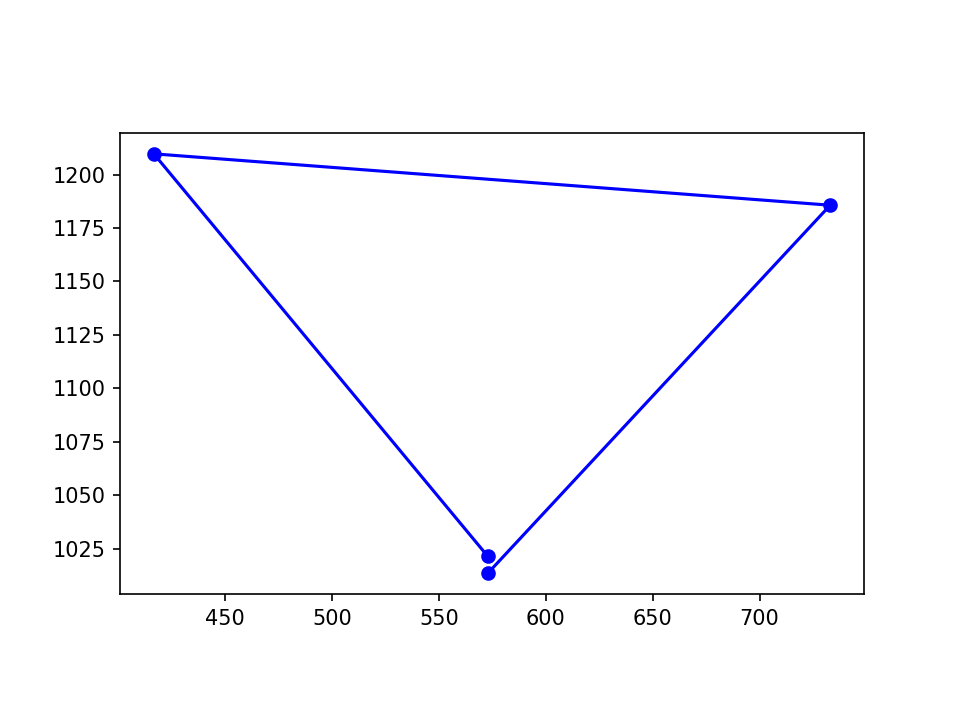

In [5]:
#correcting the y coordinates
fig, ax = plt.subplots()
ax.plot(data[:,0],imgsize[0]-data[:,1], 'bo-')
ax.set_aspect(1)
plt.show()

We need to change the origin to the lower left.  In this case we only need to correct the y-axis.  We just need to find the maximum y-value and subtract our points from it.  We called this **ydim** below and our y-data becomes **ydim-event.ydata**   

Putting it all together...

<IPython.core.display.Javascript object>


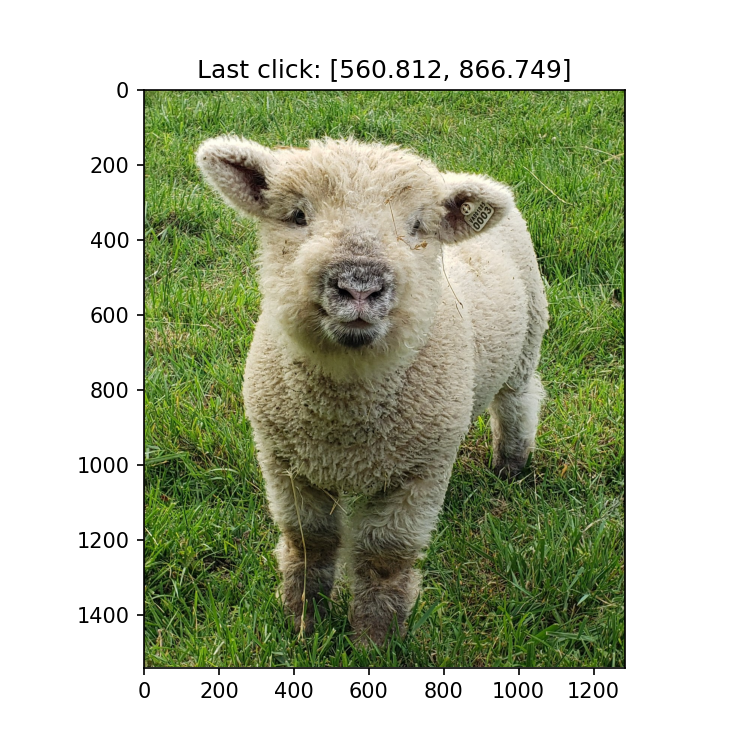

In [24]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
img = mpimg.imread('jack.jpg')
ax.imshow(img)

ydim=img.shape[0]  # added this line to grab y dimension

pos = []
def onclick(event):
    pos.append([event.xdata,ydim-event.ydata])
    ax.set_title(f'Last click: [{event.xdata:.3f}, {ydim-event.ydata:.3f}]') # edited this line to correct y values by ydim
fig.canvas.mpl_connect('button_press_event', onclick) 

fig.show()

this time let's select (1) nose, left eye, right eye, nose and (2) mouth, left nostril, right nostril, mouth and (3) chin, left ear, right ear, chin.  I'll have 12 points stored in the variable "pos" that I can split into three sets using  ```data1=pos[0:4]``` and ```data2=pos[4:9]``` and ```data3=pos[9:13]```

<IPython.core.display.Javascript object>


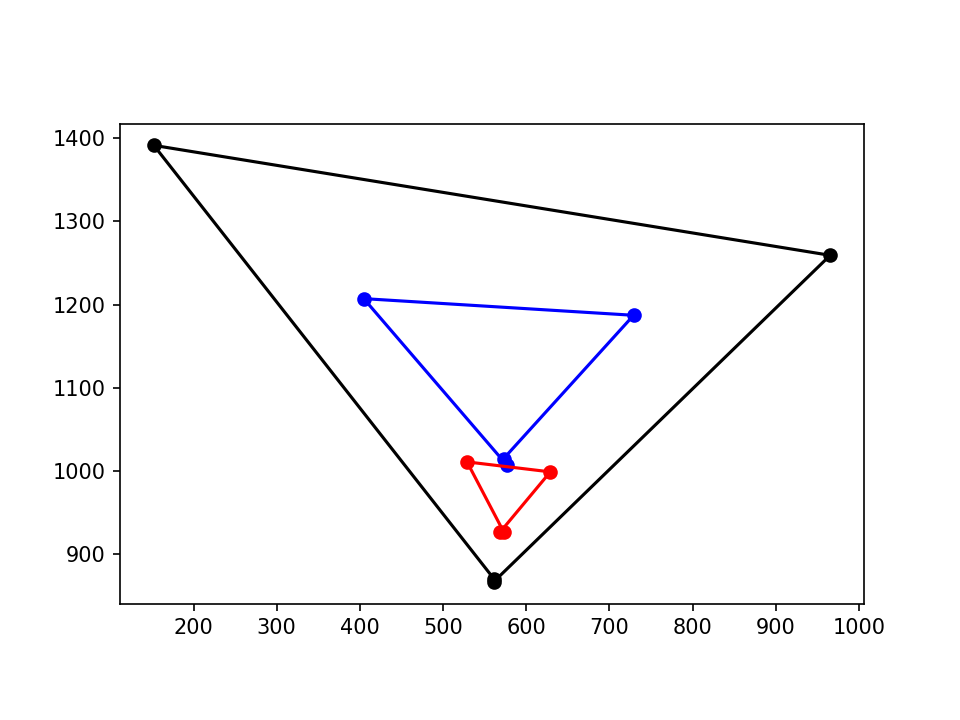

In [26]:
data1=np.array(pos[0:4])
data2=np.array(pos[4:8])
data3=np.array(pos[8:12])
fig.canvas.mpl_disconnect(cid)
fig, ax = plt.subplots()
ax.plot(data1[:,0],data1[:,1], 'bo-') # nose, eyes
ax.plot(data2[:,0],data2[:,1], 'ro-') # chin, nostrils
ax.plot(data3[:,0],data3[:,1], 'ko-') # mouth, ears
ax.set_aspect(1)
plt.show()